In [1]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pwd

'/Users/rtmac/Data-Science/TDI/Project'

In [3]:
df = pd.read_csv("Data/TED_Talks_by_ID_plus-transcripts-and-LIWC-and-MFT-plus-views.csv")

In [4]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Columns: 123 entries, id to morality_general
dtypes: float64(109), int64(3), object(11)
memory usage: 2.3+ MB
None


In [5]:
def display_all(data):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): 
        display(data)

In [6]:
df.head(10)

,id,speaker,headline,URL,description,transcript_URL,month_filmed,year_filmed,event,duration,...,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
0,1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,0:16:17,...,0.04,0.00,0.00,0.48,0.00,0.22,0.0,0.00,0.00,0.22
1,2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,2,2006,TED2006,0:15:06,...,0.04,0.00,0.00,0.30,0.00,0.11,0.0,0.11,0.04,0.15
2,3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,7,2005,TEDGlobal 2005,0:18:45,...,0.12,0.16,0.04,0.32,0.12,0.20,0.0,0.04,0.04,0.08
3,4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,2,2006,TED2006,0:19:37,...,0.19,0.00,0.00,0.19,0.00,0.10,0.0,0.00,0.00,0.16
4,5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,0:20:04,...,0.05,0.03,0.00,0.39,0.00,0.05,0.0,0.00,0.03,0.13
5,6,Craig Venter,Sampling the ocean's DNA,http://www.ted.com/talks/view/id/6,Genomics pioneer Craig Venter takes a break fr...,http://www.ted.com/talks/view/id/6/transcript?...,7,2005,TEDGlobal 2005,0:16:51,...,0.08,0.08,0.00,0.27,0.04,0.31,0.0,0.04,0.00,0.08
6,7,David Pogue,Simplicity sells,http://www.ted.com/talks/view/id/7,New York Times columnist David Pogue takes aim...,http://www.ted.com/talks/view/id/7/transcript?...,2,2006,TED2006,0:21:26,...,0.00,0.00,0.00,0.11,0.00,0.03,0.0,0.03,0.06,0.44
7,8,David Rockwell,A memorial at Ground Zero,http://www.ted.com/talks/view/id/8,In this emotionally charged conversation with ...,http://www.ted.com/talks/view/id/8/transcript?...,2,2002,TED2002,0:24:37,...,0.07,0.02,0.00,0.45,0.00,0.17,0.0,0.17,0.00,0.02
8,9,Dean Kamen,To invent is to give,http://www.ted.com/talks/view/id/9,Inventor Dean Kamen lays out his argument for ...,http://www.ted.com/talks/view/id/9/transcript?...,2,2002,TED2002,0:20:07,...,0.09,0.06,0.00,0.18,0.00,0.15,0.0,0.12,0.00,0.09
9,10,Dean Ornish,The killer American diet that's sweeping the p...,http://www.ted.com/talks/view/id/10,Forget the latest disease in the news: Cardiov...,http://www.ted.com/talks/view/id/10/transcript...,2,2006,TED2006,0:03:18,...,0.16,0.16,0.00,0.16,0.00,0.16,0.0,0.00,0.96,0.16


In [7]:
display_all(df.columns)

Index(['id', 'speaker', 'headline', 'URL', 'description', 'transcript_URL',
       'month_filmed', 'year_filmed', 'event', 'duration',
       ...
       'harm_vice', 'fairness_virtue', 'fairness_vice', 'ingroup_virtue',
       'ingroup_vice', 'authority_virtue', 'authority_vice', 'purity_virtue',
       'purity_vice', 'morality_general'],
      dtype='object', length=123)

In [8]:
print (df['views_as_of_06162017'].describe())

count    2.474000e+03
mean     1.655206e+06
std      2.417392e+06
min      5.004000e+04
25%      7.300080e+05
50%      1.100652e+06
75%      1.662359e+06
max      4.562291e+07
Name: views_as_of_06162017, dtype: float64


In [9]:
df_num = df.select_dtypes(include=[np.float64, np.int64])

In [10]:
df_num = df_num.dropna()

In [17]:
print (df_num['year_filmed'].value_counts())

2013    268
2010    259
2012    258
2011    237
2015    237
2014    236
2016    230
2009    212
2007    110
2008     86
2005     62
2006     47
2017     39
2003     35
2004     32
2002     26
1998      6
2001      3
1994      1
1990      1
1984      1
Name: year_filmed, dtype: int64


In [18]:
list_years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
df_num_2007_2016 = df_num[df_num.year_filmed.isin(list_years)].copy()

In [19]:
print (df_num_2007_2016['year_filmed'].value_counts())

2013    268
2010    259
2012    258
2015    237
2011    237
2014    236
2016    230
2009    212
2007    110
2008     86
Name: year_filmed, dtype: int64


In [20]:
df_num_2007_2016['num_years'] = 2017 - df_num_2007_2016['year_filmed']

In [22]:
df_num_2007_2016['View_per_year'] = np.divide(df_num_2007_2016['views_as_of_06162017'], df_num_2007_2016['num_years'] ) 

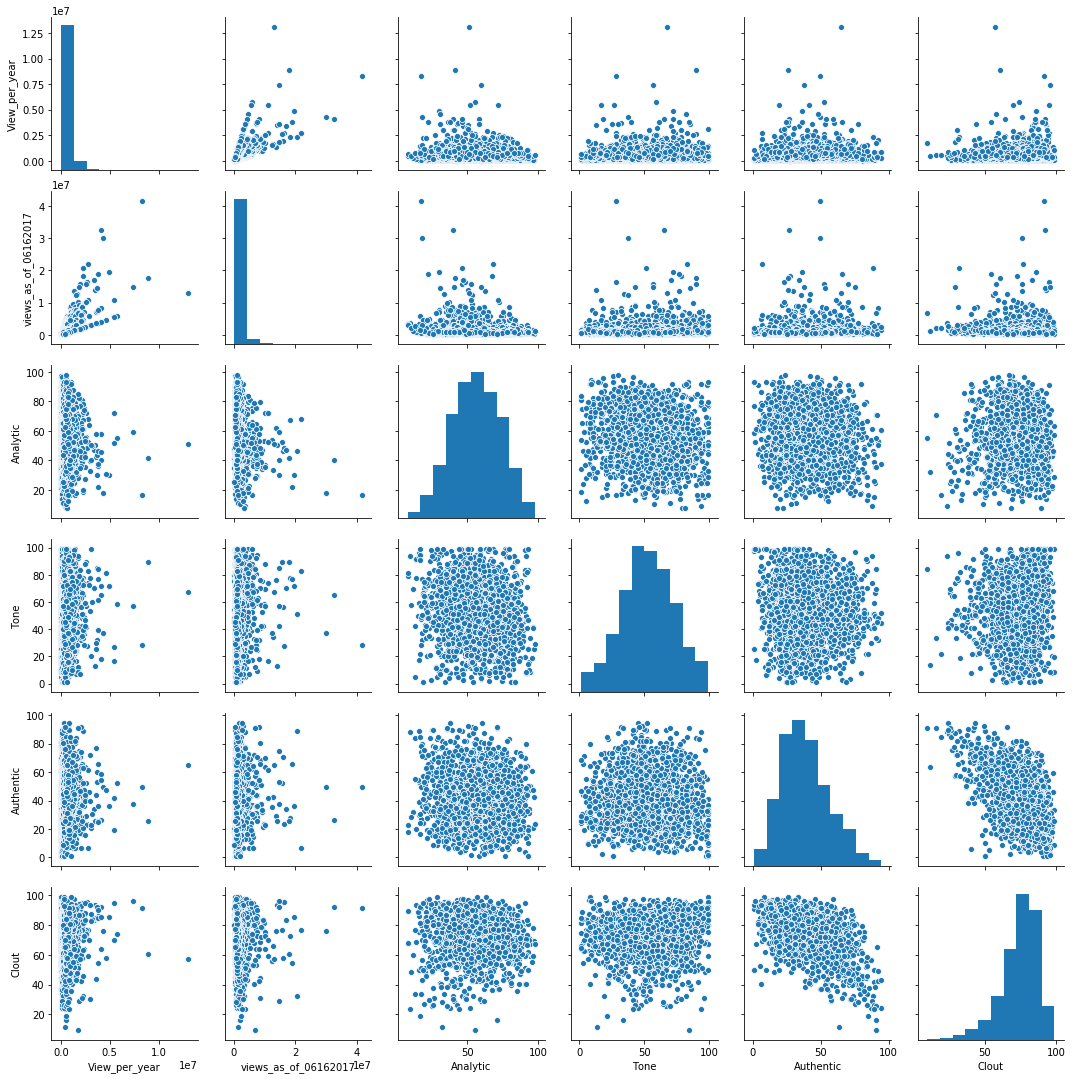

In [23]:
sns.pairplot(df_num_2007_2016, vars=['View_per_year','views_as_of_06162017','Analytic','Tone','Authentic','Clout'])
plt.show()

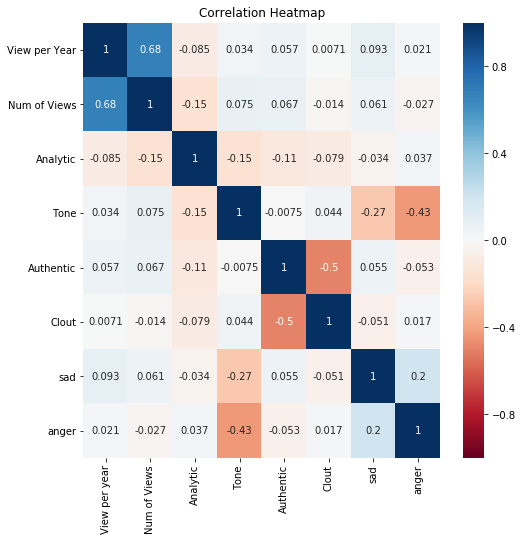

In [24]:
corr_data = df_num_2007_2016[['View_per_year','views_as_of_06162017','Analytic','Tone','Authentic','Clout','sad','anger']]
corr = corr_data.corr()

# plot the heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['View per year','Num of Views','Analytic','Tone','Authentic','Clout','sad','anger'], yticklabels=['View per Year','Num of Views','Analytic','Tone','Authentic','Clout','sad','anger'],vmin=1,vmax=-1)
plt.title("Correlation Heatmap")
plt.show()